In [7]:
#Importing the labraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#setting the theme and size of plot
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (14, 8)

In [9]:
#reading the file
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

In [10]:
#Getting the size of data
matches.shape

(636, 18)

In [11]:
#Getting the featues available in the data
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
id                 636 non-null int64
season             636 non-null int64
city               629 non-null object
date               636 non-null object
team1              636 non-null object
team2              636 non-null object
toss_winner        636 non-null object
toss_decision      636 non-null object
result             636 non-null object
dl_applied         636 non-null int64
winner             633 non-null object
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    633 non-null object
venue              636 non-null object
umpire1            635 non-null object
umpire2            635 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(5), object(12)
memory usage: 89.5+ KB


In [12]:
#Getting the summary statistics about the data
matches.describe()

C:\Users\justAKASH\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,636.000000,636.000000,636.000000,636.000000,636.000000,0.0
mean,318.500000,2012.490566,0.025157,13.682390,3.372642,NaN
std,183.741666,2.773026,0.156726,23.908877,3.420338,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,159.750000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,318.500000,2012.000000,0.000000,0.000000,4.000000,NaN
75%,477.250000,2015.000000,0.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,1.000000,146.000000,10.000000,NaN


In [13]:
#No. of matches we have in our dataset
matches['id'].max()

636

In [14]:
#No. of seasons we have in dataset
matches['season'].unique()
len(matches['season'].unique())

10

In [15]:
#Team has won by maximum runs
matches.iloc[matches['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

### 'idxmax' will return the id of the maximumth value which in turn is fed into iloc that takes an index value and returns the row.

In [16]:
#Getting the winning team
matches.iloc[matches['win_by_runs'].idxmax()]['winner']

'Mumbai Indians'

In [17]:
#Won by maximum wickets
matches.iloc[matches['win_by_wickets'].idxmax()]

id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
umpire3       

In [18]:
#Team won by maximum wickets
matches.iloc[matches['win_by_wickets'].idxmax()]['winner']

'Kolkata Knight Riders'

In [19]:
#Won by (closest margin) minimum runs
matches.iloc[matches['win_by_runs'].idxmin()]

id                                                       2
season                                                2017
city                                                  Pune
date                                            2017-04-06
team1                                       Mumbai Indians
team2                               Rising Pune Supergiant
toss_winner                         Rising Pune Supergiant
toss_decision                                        field
result                                              normal
dl_applied                                               0
winner                              Rising Pune Supergiant
win_by_runs                                              0
win_by_wickets                                           7
player_of_match                                  SPD Smith
venue              Maharashtra Cricket Association Stadium
umpire1                                     A Nand Kishore
umpire2                                             S Ra

In [20]:
#Team has won by (closest margin) minimum runs
matches.iloc[matches['win_by_runs'].idxmin()]['winner']

'Rising Pune Supergiant'

An Explanation:
In Cricket, if the team that’s batting second wins the match (by chasing), it’ll be said “Team second won by x number of wickets” and if the team that’s bowling second (batted first) wins the match (by defending their score), it’ll be said “Team first won by x number of runs”. Hence, the minimum win by runs will always be 0 and the minimum win by wickets will also always be 0 in a tournament since sometimes chasing team or sometimes the team that batted first could win.

Instead of just getting the minimum score (which always would be 0), we have subsetted the data that has win_by_runs greater than or equal to 1 (there by eliminating the zero-issue).

In [21]:
matches.iloc[matches[matches['win_by_runs'].ge(1)].win_by_runs.idxmin()]['winner']

'Mumbai Indians'

In [22]:
#Team won by maximum wickets
matches.iloc[matches[matches['win_by_wickets'].ge(1)].win_by_wickets.idxmax()]['winner']

'Kolkata Knight Riders'

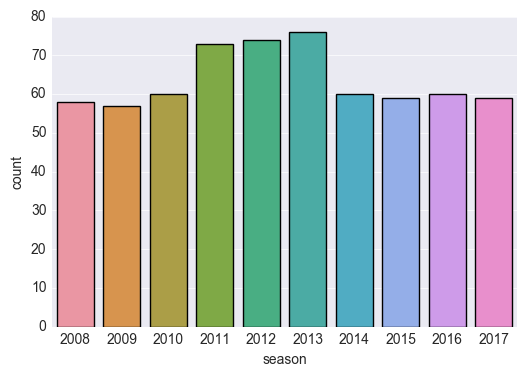

In [25]:
#Which season had the most number of matches
%matplotlib inline
sns.countplot(x='season', data=matches)
plt.show()

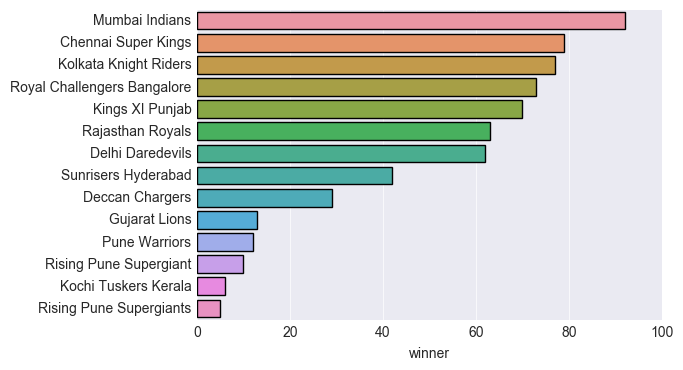

In [26]:
#most successful IPL team
data = matches.winner.value_counts()
sns.barplot(y = data.index, x = data, orient='h')

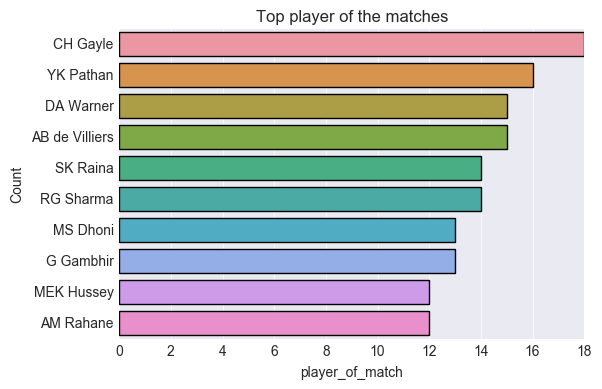

In [28]:
#Top player of the match Winners
top_players = matches.player_of_match.value_counts()[:10]
fig, ax = plt.subplots()
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title('Top player of the matches')
sns.barplot(x = top_players, y = top_players.index)
plt.show()

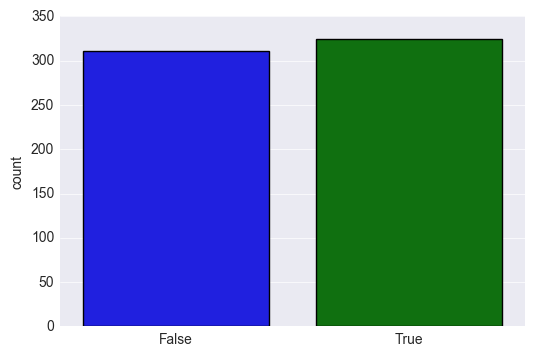

In [29]:
#How toss winning help
ss = matches['winner'] == matches['toss_winner']
ss.groupby(ss).size()
sns.countplot(ss)

## Hence Winning the toss has helped the team most of the times.